In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
import torch
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.IntegralEquations import IntegralEquations
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
from math import pi

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [3]:
true_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                                        integration_func,
                                                        nn_model,
                                                        curr_v,
                                                        left_border,
                                                        right_border,
                                                        n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.002943575382232666
Valid max absolute error |Appr(x)-y(x)|: 0.003005504608154297
MAPE on train data: 0.11510507902130485 %
MAPE on validation data: 0.10461619822308421 %
Max residual square loss on train at last epoch: 0.002669692039489746 


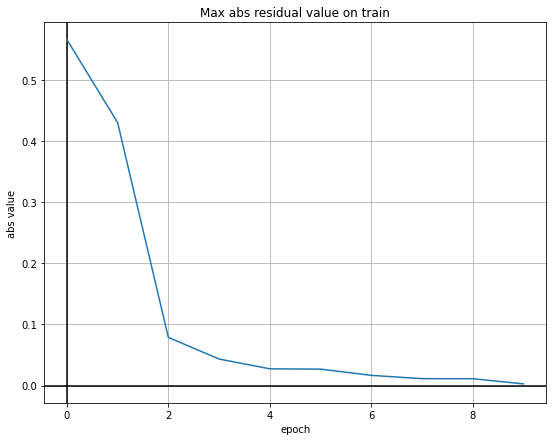

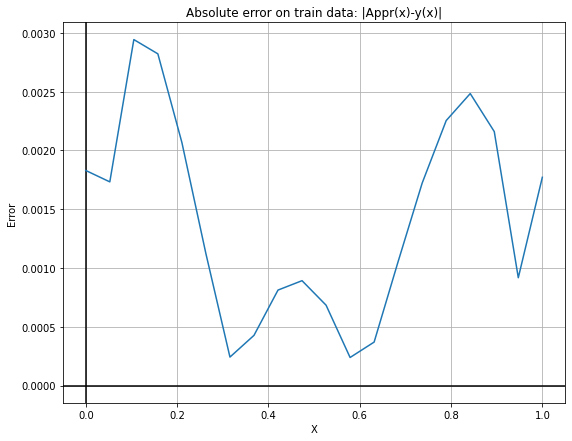

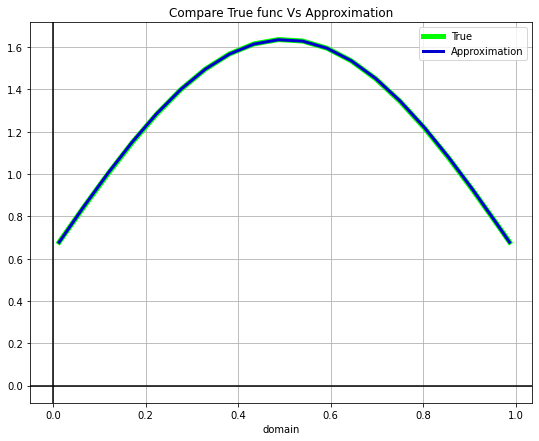

In [4]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

In [5]:
report.print_comparison_table()

train data
       Input  Analytical       ANN     Error
0   0.000000    0.636620  0.634790  0.001830
1   0.052632    0.801214  0.802947  0.001733
2   0.105263    0.961319  0.964263  0.002944
3   0.157895    1.112567  1.115389  0.002822
4   0.210526    1.250833  1.252900  0.002068
5   0.263158    1.372344  1.373465  0.001121
6   0.315789    1.473786  1.474028  0.000242
7   0.368421    1.552393  1.551966  0.000427
8   0.421053    1.606020  1.605208  0.000812
9   0.473684    1.633204  1.632312  0.000892
10  0.526316    1.633204  1.632521  0.000684
11  0.578947    1.606020  1.605782  0.000238
12  0.631579    1.552393  1.552763  0.000369
13  0.684211    1.473786  1.474841  0.001055
14  0.736842    1.372344  1.374066  0.001722
15  0.789474    1.250833  1.253087  0.002254
16  0.842105    1.112567  1.115051  0.002484
17  0.894737    0.961319  0.963480  0.002161
18  0.947368    0.801214  0.802131  0.000917
19  1.000000    0.636620  0.634848  0.001772


# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [6]:
true_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
left_border = 0
right_border = pi/2
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                    integration_func,
                                    nn_model,
                                    curr_v,
                                    left_border,
                                    right_border,
                                    n_points) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.002657651901245117
Valid max absolute error |Appr(x)-y(x)|: 0.0025795698165893555
MAPE on train data: 0.14816911425441504 %
MAPE on validation data: 0.14776767930015922 %
Max residual square loss on train at last epoch: 0.00014678016304969788 


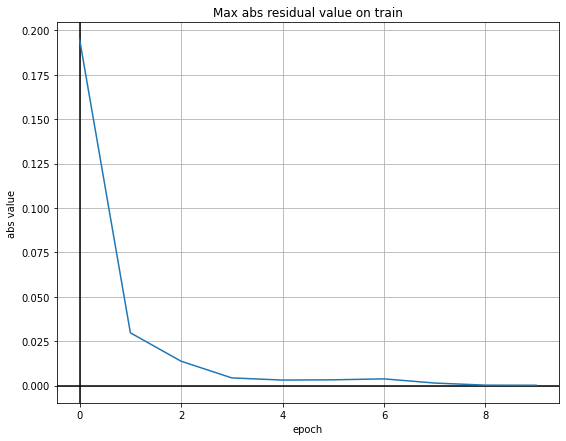

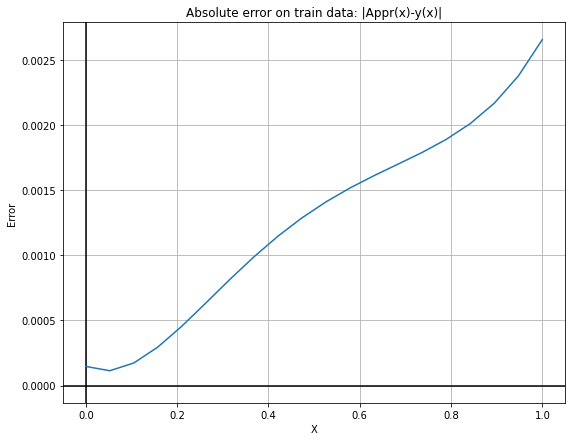

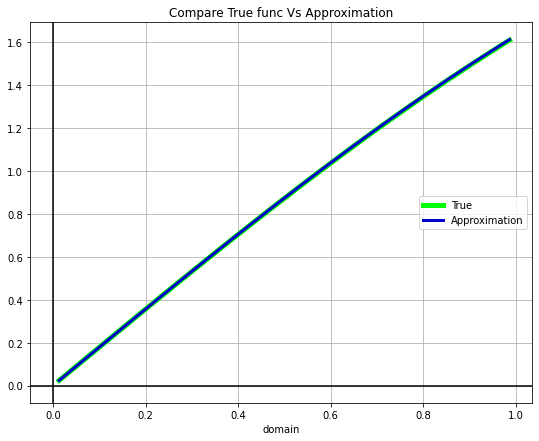

In [7]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [8]:
true_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               IntegralEquations.calculateFredholmEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.02024763822555542
Valid max absolute error |Appr(x)-y(x)|: 0.035674914717674255
MAPE on train data: 0.3667907789349556 %
MAPE on validation data: 0.44979038648307323 %
Max residual square loss on train at last epoch: 0.02011524885892868 


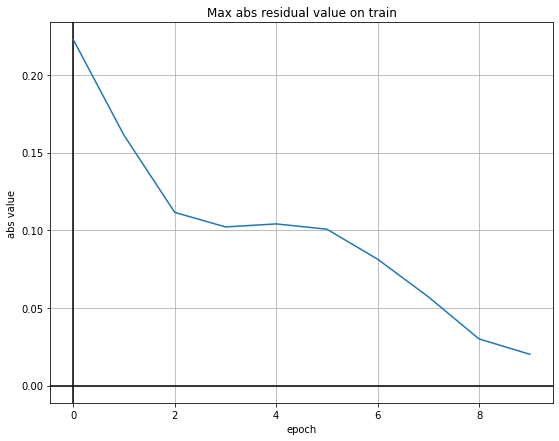

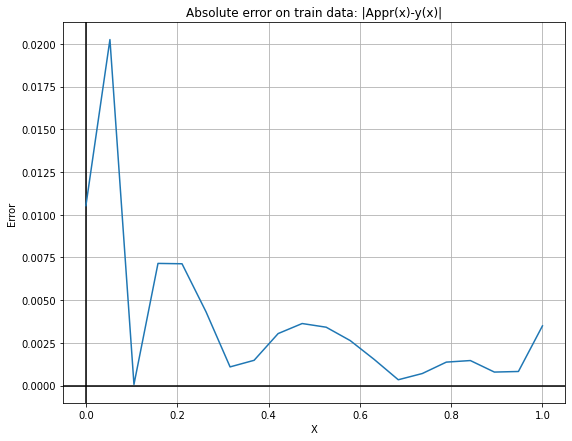

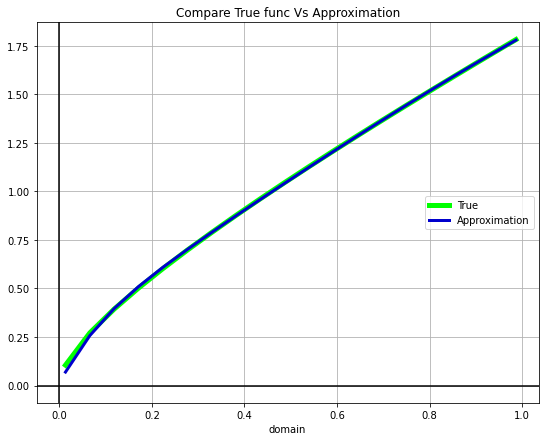

In [9]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

In [10]:
report.print_comparison_table()

train data
       Input  Analytical       ANN     Error
0   0.000000    0.000000  0.010529  0.010529
1   0.052632    0.236164  0.215917  0.020248
2   0.105263    0.364817  0.364754  0.000063
3   0.157895    0.475782  0.482929  0.007146
4   0.210526    0.577591  0.584717  0.007125
5   0.263158    0.673549  0.677860  0.004311
6   0.315789    0.765351  0.766440  0.001089
7   0.368421    0.854003  0.852528  0.001475
8   0.421053    0.940161  0.937122  0.003040
9   0.473684    1.024282  1.020655  0.003627
10  0.526316    1.106697  1.103285  0.003412
11  0.578947    1.187656  1.185027  0.002629
12  0.631579    1.267354  1.265831  0.001524
13  0.684211    1.345947  1.345610  0.000337
14  0.736842    1.423558  1.424259  0.000701
15  0.789474    1.500292  1.501661  0.001369
16  0.842105    1.576236  1.577696  0.001460
17  0.894737    1.651461  1.652247  0.000786
18  0.947368    1.726031  1.725211  0.000820
19  1.000000    1.800000  1.796510  0.003490


# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [11]:
true_solution = lambda x_var: x_var
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - 
               IntegralEquations.calculateVolterraEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = OneDimensionalMainEquation(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0012530088424682617
Valid max absolute error |Appr(x)-y(x)|: 0.0011407136917114258
MAPE on train data: 0.11868588626384735 %
MAPE on validation data: 0.11678826995193958 %
Max residual square loss on train at last epoch: 0.0012660771608352661 


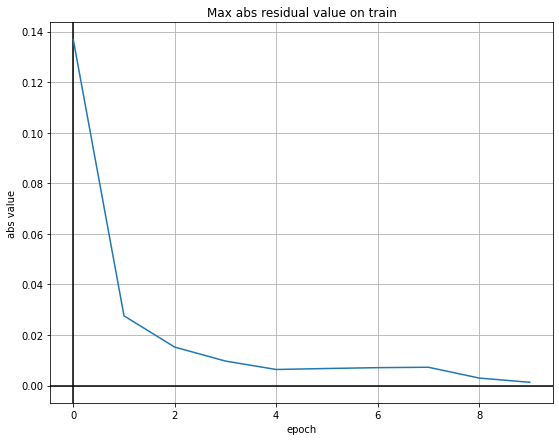

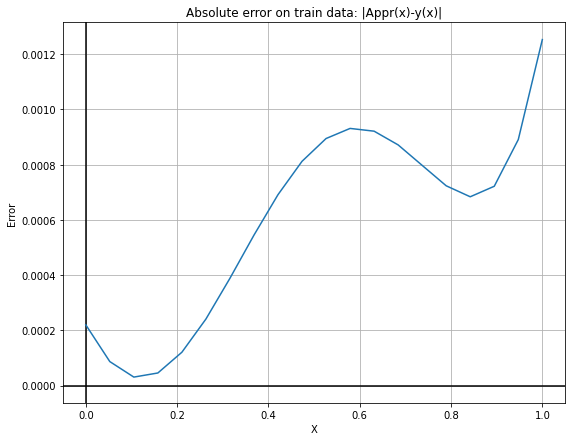

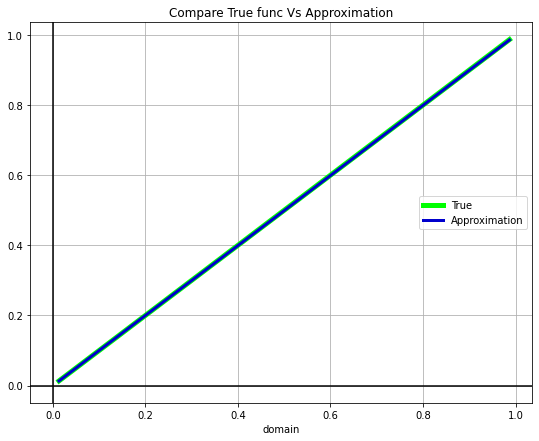

In [12]:
report = ReportMaker(
        true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, n_epochs
    )
report.make_report()

In [13]:
report.print_comparison_table()

train data
       Input  Analytical       ANN     Error
0   0.000000    0.000000 -0.000220  0.000220
1   0.052632    0.052632  0.052545  0.000087
2   0.105263    0.105263  0.105233  0.000030
3   0.157895    0.157895  0.157849  0.000045
4   0.210526    0.210526  0.210406  0.000121
5   0.263158    0.263158  0.262917  0.000241
6   0.315789    0.315789  0.315401  0.000388
7   0.368421    0.368421  0.367876  0.000545
8   0.421053    0.421053  0.420361  0.000691
9   0.473684    0.473684  0.472872  0.000812
10  0.526316    0.526316  0.525421  0.000895
11  0.578947    0.578947  0.578016  0.000931
12  0.631579    0.631579  0.630658  0.000921
13  0.684211    0.684211  0.683339  0.000871
14  0.736842    0.736842  0.736045  0.000797
15  0.789474    0.789474  0.788750  0.000723
16  0.842105    0.842105  0.841422  0.000684
17  0.894737    0.894737  0.894015  0.000722
18  0.947368    0.947368  0.946478  0.000891
19  1.000000    1.000000  0.998747  0.001253
